Импортируем нужные библиотеки.

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

import seaborn as sns
import matplotlib.pyplot as plt
# Надо импортнуть всякие керасы-херасы

In [2]:
data_may = pd.read_excel('data_may.xlsx')
data_may.columns = data_may.iloc[1]
data_may = data_may[2:]
data_may.index = pd.RangeIndex(857)
del data_may[data_may.columns[22]]

data_july_sept = pd.read_excel('data_july-sep.xlsx')
data_july_sept.columns = data_july_sept.iloc[1]
data_july_sept = data_july_sept[2:]
data_july_sept.index = pd.RangeIndex(2881)
del data_july_sept[data_july_sept.columns[22]]

data = data_may.merge(data_july_sept, how='outer')
data

1,№ п/п,Паспорт разливки плавки,Дата,"Вес заготовок, т",Марка стали полученная,ГОСТ,Плавка в серии,Сечение заготовки,Тип разливки,"Вес стали (со стенда ППС), т",...,"Pb, %","Sb, %","Mg, %","Zn, %","Сэ, %",Тип защитной трубы,Тип погружного стакана,Тип стакана дозатора п/к,Тип стопора п/к,Замечания по плавке
0,2,12002879,01.05.2020,"170,188",Арм240,ГОСТ 34028-2016,6,150x150,Открытая,NaN,...,NaN,NaN,NaN,NaN,NaN,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN
1,8,12002883,01.05.2020,"144,9",Арм240,ГОСТ 34028-2016,4,150x150,Открытая,NaN,...,NaN,NaN,NaN,NaN,NaN,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN
2,9,12002886,01.05.2020,168,Арм240,ГОСТ 34028-2016,5,150x150,Открытая,NaN,...,NaN,NaN,NaN,NaN,NaN,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN
3,11,12002888,01.05.2020,"170,1",Ст3сп,Контракт,7,150x150,Открытая,NaN,...,NaN,NaN,NaN,NaN,0.329,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,"Затягивание металлопровода пром.ковша на 0,4м/..."
4,16,12002893,01.05.2020,"163,8",Ст3сп,Контракт,12,150x150,Открытая,NaN,...,NaN,NaN,NaN,NaN,0.318,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,2877,12007491,01.10.2020,"160,368",Арм500,ГОСТ 34028-2016,2,180x180,Открытая,NaN,...,0.0047,NaN,0.0001,NaN,NaN,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN
3734,2878,12007492,01.10.2020,"166,536",Арм500,ГОСТ 34028-2016,3,180x180,Открытая,NaN,...,0.0046,NaN,0.0001,NaN,NaN,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN
3735,2879,12007493,02.10.2020,"160,368",Арм500,ГОСТ 34028-2016,4,180x180,Открытая,NaN,...,0.0047,NaN,NaN,NaN,NaN,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN
3736,2880,12007494,02.10.2020,"166,536",Арм500,ГОСТ 34028-2016,5,180x180,Открытая,NaN,...,0.0047,NaN,NaN,NaN,NaN,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN


In [3]:
i = 0
for column in data.columns:
    i += 1
    print(i*100//len(data.columns), end=' ')
    if data[column].dtypes == np.float64:
        continue
    try:
        data[column] = data[column].astype('float')
    except ValueError:
        try:
            data[column] = data[column].astype('datetime64[ns]')
        except ValueError:
            # print('First', column)
            for index in range(len(data)):
                if data.loc[index, column] is np.nan:
                    data.loc[index, column] = '0'
                data.loc[index, column] = data.loc[index, column].replace(',', '.')
            try:
                data[column] = data[column].astype('float')
            except ValueError:
                try:
                    data[column] = data[column].astype('datetime64[ns]')
                except ValueError:
                    pass
                    # print('Second', column)
data.dtypes.values

1 2 3 5 6 7 9 10 11 13 14 15 17 18 19 21 22 23 25 26 27 28 30 31 32 34 35 36 38 39 40 42 43 44 46 47 48 50 51 52 53 55 56 57 59 60 61 63 64 65 67 68 69 71 72 73 75 76 77 78 80 81 82 84 85 86 88 89 90 92 93 94 96 97 98 100 

array([dtype('float64'), dtype('float64'), dtype('<M8[ns]'),
       dtype('float64'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('O'), dtype('O'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('O'), dtype('float64'),
       dtype('<M8[ns]'), dtype('float64'), dtype('<M8[ns]'),
       dtype('float64'), dtype('<M8[ns]'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),


In [4]:
data_copy = data.copy()

In [5]:
with pd.option_context('display.max_rows', None,'display.max_columns', None):
    display(data_copy.describe())

1,№ п/п,Паспорт разливки плавки,"Вес заготовок, т",Плавка в серии,"Вес стали (со стенда ППС), т","Вес стали расчет., т","Вес шлака при закрытии с/к, т","Остаток металла в с/к, т","Вес разлитой стали, т","Остатки в п/к, т","Тех. обрезь, т",№ с/к,"Темп. стали в с/к, °C",№ п/к,"Стойкость гильзы кр-ра 1, т","Стойкость гильзы кр-ра 2, т","Стойкость гильзы кр-ра 3, т","Стойкость гильзы кр-ра 4, т","Стойкость гильзы кр-ра 5, т","Стойкость гильзы кр-ра 6, т","Частота качания, кол-во/мин","Ход кр-ра, мм","Скорость разливки, м/мин","Расход воды на кр-р, л/мин","Дельта температуры воды, °C","Расход воды ЗВО №1, л/мин","Расход воды ЗВО №2, л/мин","Расход воды ЗВО №3, л/мин","Брак всего, кг",Кол-во НЛЗ 1 ручей,Кол-во НЛЗ 2 ручей,Кол-во НЛЗ 3 ручей,Кол-во НЛЗ 4 ручей,Кол-во НЛЗ 5 ручей,Кол-во НЛЗ 6 ручей,"Кол-во, т","Темп 1, °С","Темп 2, °С","C, %","Si, %","Mn,%","S, %","P, %","Cr, %","Ni, %","Cu, %","As, %","Mo, %","Nb, %","Sn, %","Ti, %","V, %","Al, %","Ca, %","N, %","W, %","Bi, %","Pb, %","Sb, %","Mg, %","Zn, %","Сэ, %"
count,3738.000000,3.738000e+03,3738.000000,3734.000000,0.0,3738.000000,3.738000e+03,3738.000000,3738.000000,3738.000000,14.000000,3680.000000,3737.000000,3729.000000,3730.000000,3635.000000,3634.000000,3673.000000,3718.000000,3.730000e+03,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3736.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3738.000000,3732.000000,3732.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3736.000000,3737.000000,3736.000000,421.000000,3736.000000,3738.000000,3738.000000,3738.000000,3738.000000,0.0,0.0,2875.000000,0.0,2193.000000,1440.000000,1836.000000
mean,1208.981808,1.200542e+07,163.096080,20.134440,NaN,164.129413,1.800000e+00,0.418620,163.710793,0.182913,3.971429,6.315217,1566.783516,23.179941,5711.218767,5898.692985,5478.534673,5712.760686,5633.689618,7.336251e+03,195.481808,8.645265,2.077314,2137.124131,8.959337,314.796148,351.502675,115.086724,1717.0,NaN,NaN,NaN,NaN,NaN,NaN,0.014821,1540.611736,1540.093516,0.192717,0.188773,0.769727,0.006970,0.014849,0.046209,0.016959,0.036602,0.001020,0.002664,0.000441,0.000721,0.001039,0.002576,0.003005,0.001121,0.006537,NaN,NaN,0.003785,NaN,0.000117,0.001948,0.340896
std,853.403463,1.372219e+03,5.415066,13.243101,NaN,4.927365,1.165890e-13,0.874652,5.014445,1.353862,8.335988,3.607788,17.724968,823.815801,3333.096737,3461.054169,3436.859483,3160.998347,3559.317643,1.387688e+05,10.281992,2.574115,0.273069,59.046329,0.275587,22.097400,29.803928,20.998259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.036564,8.196109,8.220043,0.018910,0.073084,0.268784,0.003785,0.004006,0.012072,0.006730,0.010360,0.000434,0.001406,0.000156,0.003208,0.000315,0.001151,0.000894,0.000544,0.001532,NaN,NaN,0.001030,NaN,0.000065,0.000922,0.067828
min,1.000000,1.200288e+07,73.779000,1.000000,NaN,126.841000,1.800000e+00,0.400000,110.835000,0.000000,0.610000,1.000000,567.000000,1.000000,25.000000,25.000000,25.000000,9.000000,25.000000,2.400000e+01,150.000000,5.000000,1.000000,1255.000000,6.000000,120.000000,125.000000,50.000000,1717.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1522.000000,1518.000000,0.057900,0.104100,0.444300,0.001000,0.005200,0.016600,0.000800,0.007500,0.000100,0.000100,0.000100,0.000100,0.000500,0.000100,0.001300,0.000100,0.001600,NaN,NaN,0.000800,NaN,0.000100,0.000300,0.260000
25%,468.000000,1.200469e+07,159.744000,9.000000,NaN,160.496000,1.800000e+00,0.400000,160.096000,0.000000,0.987500,3.000000,1563.000000,2.000000,3324.250000,3523.000000,2746.250000,3105.000000,2718.000000,1.976000e+03,200.000000,7.000000,2.000000,2155.000000,9.000000,320.000000,350.000000,110.000000,1717.0,NaN,NaN,NaN,NaN,NaN,NaN,0.010000,1538.000000,1537.000000,0.186700,0.158800,0.523600,0.004000,0.012000,0.038300,0.014100,0.031000,0.000800,0.001800,0.000300,0.000200,0.000800,0.001900,0.002400,0.000800,0.005600,NaN,NaN,0.002900,NaN,0.000100,0.001300,0.296000
50%,1012.500000,1.200563e+07,162.816000,18.000000,NaN,163.575000,1.800000e+00,0.40000

In [7]:
print(1, end=' ')
for i in range(len(data_copy.columns)):
    print(data_copy.columns[i].ljust(28), end=' ')
    if (i + 1) % 4 == 0:
        print()
        print((i+5)//4, end=' ')
data_copy.columns

1 № п/п                        Паспорт разливки плавки      Дата                         Вес заготовок, т             
2 Марка стали полученная       ГОСТ                         Плавка в серии               Сечение заготовки            
3 Тип разливки                 Вес стали (со стенда ППС), т Вес стали расчет., т         Вес шлака при закрытии с/к, т 
4 Остаток металла в с/к, т     Вес разлитой стали, т        Остатки в п/к, т             Тех. обрезь, т               
5 № с/к                        Темп. стали в с/к, °C        № п/к                        Стойкость гильзы кр-ра 1, т  
6 Стойкость гильзы кр-ра 2, т  Стойкость гильзы кр-ра 3, т  Стойкость гильзы кр-ра 4, т  Стойкость гильзы кр-ра 5, т  
7 Стойкость гильзы кр-ра 6, т  Частота качания, кол-во/мин  Ход кр-ра, мм                Скорость разливки, м/мин     
8 Расход воды на кр-р, л/мин   Дельта температуры воды, °C  Расход воды ЗВО №1, л/мин    Расход воды ЗВО №2, л/мин    
9 Расход воды ЗВО №3, л/мин    Брак всего, кг  

Index(['№ п/п', 'Паспорт разливки плавки', 'Дата', 'Вес заготовок, т',
       'Марка стали полученная', 'ГОСТ', 'Плавка в серии', 'Сечение заготовки',
       'Тип разливки', 'Вес стали (со стенда ППС), т', 'Вес стали расчет., т',
       'Вес шлака при закрытии с/к, т', 'Остаток металла в с/к, т',
       'Вес разлитой стали, т', 'Остатки в п/к, т', 'Тех. обрезь, т', '№ с/к',
       'Темп. стали в с/к, °C', '№ п/к', 'Стойкость гильзы кр-ра 1, т',
       'Стойкость гильзы кр-ра 2, т', 'Стойкость гильзы кр-ра 3, т',
       'Стойкость гильзы кр-ра 4, т', 'Стойкость гильзы кр-ра 5, т',
       'Стойкость гильзы кр-ра 6, т', 'Частота качания, кол-во/мин',
       'Ход кр-ра, мм', 'Скорость разливки, м/мин',
       'Расход воды на кр-р, л/мин', 'Дельта температуры воды, °C',
       'Расход воды ЗВО №1, л/мин', 'Расход воды ЗВО №2, л/мин',
       'Расход воды ЗВО №3, л/мин', 'Брак всего, кг', 'Кол-во НЛЗ 1 ручей',
       'Кол-во НЛЗ 2 ручей', 'Кол-во НЛЗ 3 ручей', 'Кол-во НЛЗ 4 ручей',
       'Ко

In [146]:
columns_factors = ['Вес заготовок, т', 'Плавка в серии', 'Сечение заготовки', 'Тип разливки', 'Вес стали расчет., т', 
                   'Остаток металла в с/к, т', 'Вес разлитой стали, т', 'Остатки в п/к, т', 'Тех. обрезь, т', '№ с/к', 
                   'Темп. стали в с/к, °C', '№ п/к', 'Частота качания, кол-во/мин', 'Ход кр-ра, мм', 
                   'Скорость разливки, м/мин', 'Расход воды на кр-р, л/мин', 'Дельта температуры воды, °C', 
                   'Расход воды ЗВО №1, л/мин', 'Расход воды ЗВО №2, л/мин', 'Расход воды ЗВО №3, л/мин', 
                   'Темп 1, °С', 'Темп 2, °С', 
                   'C, %', 'Si, %', 'Mn,%', 'S, %', 'P, %', 'Cr, %', 'Ni, %', 'Cu, %', 'As, %', 'Mo, %', 'Nb, %', 
                   'Sn, %', 'Ti, %', 'V, %', 'Al, %', 'Ca, %', 'N, %', 'Pb, %', 'Mg, %', 'Zn, %', 'Сэ, %']
data_ml = data_copy[columns_factors]
data_ml

1,"Вес заготовок, т",Плавка в серии,Сечение заготовки,Тип разливки,"Вес стали расчет., т","Остаток металла в с/к, т","Вес разлитой стали, т","Остатки в п/к, т","Тех. обрезь, т",№ с/к,...,"Sn, %","Ti, %","V, %","Al, %","Ca, %","N, %","Pb, %","Mg, %","Zn, %","Сэ, %"
0,170.188,6.0,150x150,Открытая,173.088,0.4,172.688,0.0,NaN,4.0,...,0.0004,0.0007,0.0022,0.0029,0.0011,0.0040,NaN,NaN,NaN,NaN
1,144.900,4.0,150x150,Открытая,145.300,0.4,144.900,0.0,NaN,4.0,...,0.0004,0.0006,0.0030,0.0022,0.0008,0.0085,NaN,NaN,NaN,NaN
2,168.000,5.0,150x150,Открытая,168.400,0.4,168.000,0.0,NaN,7.0,...,0.0005,0.0007,0.0028,0.0031,0.0011,0.0068,NaN,NaN,NaN,NaN
3,170.100,7.0,150x150,Открытая,170.500,0.4,170.100,0.0,NaN,12.0,...,0.0006,0.0010,0.0030,0.0034,0.0005,0.0051,NaN,NaN,NaN,0.329
4,163.800,12.0,150x150,Открытая,164.200,0.4,163.800,0.0,NaN,12.0,...,0.0006,0.0010,0.0027,0.0032,0.0004,0.0038,NaN,NaN,NaN,0.318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,160.368,2.0,180x180,Открытая,161.121,0.4,160.721,0.0,NaN,11.0,...,NaN,0.0011,0.0016,0.0027,0.0027,0.0078,0.0047,0.0001,NaN,NaN
3734,166.536,3.0,180x180,Открытая,167.302,0.4,166.902,0.0,NaN,10.0,...,NaN,0.0012,0.0018,0.0028,0.0017,0.0069,0.0046,0.0001,NaN,NaN
3735,160.368,4.0,180x180,Открытая,161.121,0.4,160.721,0.0,NaN,1.0,...,NaN,0.0010,0.0019,0.0021,0.0017,0.0066,0.0047,NaN,NaN,NaN
3736,166.536,5.0,180x180,Открытая,167.302,0.4,166.902,0.0,NaN,3.0,...,NaN,0.0010,0.0017,0.0020,0.0015,0.0063,0.0047,NaN,NaN,NaN


In [147]:
columns_results= ['Стойкость гильзы кр-ра 1, т', 'Стойкость гильзы кр-ра 2, т', 'Стойкость гильзы кр-ра 3, т', 
                  'Стойкость гильзы кр-ра 4, т', 'Стойкость гильзы кр-ра 5, т', 'Стойкость гильзы кр-ра 6, т']
data_ml_res = data_copy[columns_results]
data_ml_res

1,"Стойкость гильзы кр-ра 1, т","Стойкость гильзы кр-ра 2, т","Стойкость гильзы кр-ра 3, т","Стойкость гильзы кр-ра 4, т","Стойкость гильзы кр-ра 5, т","Стойкость гильзы кр-ра 6, т"
0,4684.0,2925.0,1475.0,3152.0,2658.0,2487.0
1,4790.0,3091.0,1639.0,3316.0,2822.0,2646.0
2,4817.0,3118.0,1666.0,3345.0,2849.0,2676.0
3,4874.0,3175.0,1718.0,3400.0,2906.0,2730.0
4,5010.0,3315.0,1853.0,3536.0,3048.0,2869.0
...,...,...,...,...,...,...
3733,13474.0,10092.0,8088.0,8074.0,9596.0,12898.0
3734,13505.0,10116.0,8113.0,8098.0,9627.0,12929.0
3735,13530.0,10144.0,8140.0,8126.0,9651.0,12957.0
3736,13557.0,10172.0,8168.0,8157.0,9679.0,12981.0


In [148]:
data_ml_res.count()

1
Стойкость гильзы кр-ра 1, т    3730
Стойкость гильзы кр-ра 2, т    3635
Стойкость гильзы кр-ра 3, т    3634
Стойкость гильзы кр-ра 4, т    3673
Стойкость гильзы кр-ра 5, т    3718
Стойкость гильзы кр-ра 6, т    3730
dtype: int64

In [1]:
data_ml.fillna(0, inplace=True)

NameError: name 'data_ml' is not defined

In [150]:
data_ml.loc[data_ml['Тип разливки'] == 'Закрытая', 'Тип разливки'] = 1
data_ml.loc[data_ml['Тип разливки'] == 'Открытая', 'Тип разливки'] = 0
data_ml.loc[data_ml['Сечение заготовки'] == '150x150', 'Сечение заготовки'] = 150
data_ml.loc[data_ml['Сечение заготовки'] == '180x180', 'Сечение заготовки'] = 180
data_ml.loc[:, 'Сечение заготовки'] = data_ml['Сечение заготовки'].astype('float')
data_ml.loc[:, 'Тип разливки'] = data_ml['Тип разливки'].astype('float')
data_ml.dtypes.values

C:\Users\Dam_mek\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64')], dtype=object)

In [151]:
data_ml[data_ml_res.columns] = data_ml_res
data_ml = data_ml.dropna()
data_ml

1,"Вес заготовок, т",Плавка в серии,Сечение заготовки,Тип разливки,"Вес стали расчет., т","Остаток металла в с/к, т","Вес разлитой стали, т","Остатки в п/к, т","Тех. обрезь, т",№ с/к,...,"Pb, %","Mg, %","Zn, %","Сэ, %","Стойкость гильзы кр-ра 1, т","Стойкость гильзы кр-ра 2, т","Стойкость гильзы кр-ра 3, т","Стойкость гильзы кр-ра 4, т","Стойкость гильзы кр-ра 5, т","Стойкость гильзы кр-ра 6, т"
0,170.188,6.0,150.0,0.0,173.088,0.4,172.688,0.0,0.0,4.0,...,0.0000,0.0000,0.0,0.000,4684.0,2925.0,1475.0,3152.0,2658.0,2487.0
1,144.900,4.0,150.0,0.0,145.300,0.4,144.900,0.0,0.0,4.0,...,0.0000,0.0000,0.0,0.000,4790.0,3091.0,1639.0,3316.0,2822.0,2646.0
2,168.000,5.0,150.0,0.0,168.400,0.4,168.000,0.0,0.0,7.0,...,0.0000,0.0000,0.0,0.000,4817.0,3118.0,1666.0,3345.0,2849.0,2676.0
3,170.100,7.0,150.0,0.0,170.500,0.4,170.100,0.0,0.0,12.0,...,0.0000,0.0000,0.0,0.329,4874.0,3175.0,1718.0,3400.0,2906.0,2730.0
4,163.800,12.0,150.0,0.0,164.200,0.4,163.800,0.0,0.0,12.0,...,0.0000,0.0000,0.0,0.318,5010.0,3315.0,1853.0,3536.0,3048.0,2869.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,160.368,2.0,180.0,0.0,161.121,0.4,160.721,0.0,0.0,11.0,...,0.0047,0.0001,0.0,0.000,13474.0,10092.0,8088.0,8074.0,9596.0,12898.0
3734,166.536,3.0,180.0,0.0,167.302,0.4,166.902,0.0,0.0,10.0,...,0.0046,0.0001,0.0,0.000,13505.0,10116.0,8113.0,8098.0,9627.0,12929.0
3735,160.368,4.0,180.0,0.0,161.121,0.4,160.721,0.0,0.0,1.0,...,0.0047,0.0000,0.0,0.000,13530.0,10144.0,8140.0,8126.0,9651.0,12957.0
3736,166.536,5.0,180.0,0.0,167.302,0.4,166.902,0.0,0.0,3.0,...,0.0047,0.0000,0.0,0.000,13557.0,10172.0,8168.0,8157.0,9679.0,12981.0


In [275]:
data_ml['Стойкость гильзы кр-ра 1, т'].max()

17731.0

In [287]:
model = keras.Sequential([
    keras.layers.Input(shape=(43)),
    keras.layers.Dense(10, activation='linear'),
    keras.layers.Dense(17732, activation='linear')
])

In [196]:
fashion_mnist = keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [268]:
train_y.size

60000

In [288]:
wall = len(data_ml.index)*0.7

train_x1 = data_ml.loc[:wall, columns_factors].to_numpy()
train_y1 = data_ml.loc[:wall, columns_results].to_numpy()

test_x1 = data_ml.loc[wall:, columns_factors].to_numpy()
test_y1 = data_ml.loc[wall:, columns_results].to_numpy()
train_y1 = train_y1[:, 0]
test_y1 = test_y1[:, 0]
train_y1

array([4684., 4790., 4817., ..., 1313., 1341., 1368.])

In [270]:
train_x1

array([[1.70188e+02, 6.00000e+00, 1.50000e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.44900e+02, 4.00000e+00, 1.50000e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.68000e+02, 5.00000e+00, 1.50000e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.62816e+02, 1.00000e+01, 1.80000e+02, ..., 1.00000e-04,
        1.80000e-03, 0.00000e+00],
       [1.65888e+02, 1.10000e+01, 1.80000e+02, ..., 1.00000e-04,
        4.60000e-03, 0.00000e+00],
       [1.65888e+02, 1.20000e+01, 1.80000e+02, ..., 1.00000e-04,
        1.50000e-03, 0.00000e+00]])

In [289]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [282]:
model.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer
              # Минимизируемая функция потерь
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # Список метрик для мониторинга
              metrics=[keras.metrics.SparseCategoricalAccuracy()])


In [290]:
model.fit(x=train_x1, 
          y=train_y1, 
          epochs=5)

Train on 2318 samples
Epoch 1/5
2318/2318 [==============================] - 1s 499us/sample - loss: 18.1840 - accuracy: 4.3141e-04
Epoch 2/5
2318/2318 [==============================] - 1s 340us/sample - loss: 18.3794 - accuracy: 4.3141e-04
Epoch 3/5
2318/2318 [==============================] - 1s 335us/sample - loss: 18.4283 - accuracy: 4.3141e-04
Epoch 4/5
2318/2318 [==============================] - 1s 347us/sample - loss: 18.4280 - accuracy: 4.3141e-04
Epoch 5/5
2318/2318 [==============================] - 1s 348us/sample - loss: 18.4280 - accuracy: 4.3141e-04


In [291]:
test_loss, test_acc = model.evaluate(x=test_x1,  y=test_y1, verbose=1)
test_loss, test_acc

1133/1133 [==============================] - 0s 350us/sample - loss: 17.9212 - accuracy: 0.0000e+00


(17.921222363545215, 0.0)

In [152]:
data_ml.count()

1
Вес заготовок, т               3450
Плавка в серии                 3450
Сечение заготовки              3450
Тип разливки                   3450
Вес стали расчет., т           3450
Остаток металла в с/к, т       3450
Вес разлитой стали, т          3450
Остатки в п/к, т               3450
Тех. обрезь, т                 3450
№ с/к                          3450
Темп. стали в с/к, °C          3450
№ п/к                          3450
Частота качания, кол-во/мин    3450
Ход кр-ра, мм                  3450
Скорость разливки, м/мин       3450
Расход воды на кр-р, л/мин     3450
Дельта температуры воды, °C    3450
Расход воды ЗВО №1, л/мин      3450
Расход воды ЗВО №2, л/мин      3450
Расход воды ЗВО №3, л/мин      3450
Темп 1, °С                     3450
Темп 2, °С                     3450
C, %                           3450
Si, %                          3450
Mn,%                           3450
S, %                           3450
P, %                           3450
Cr, %                     

In [133]:
data_ml.to_excel("output.xlsx")  

In [7]:
data_ml.dtypes.values

array([dtype('float64'), dtype('float64'), dtype('O'), dtype('O'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64')], dtype=object)

In [8]:
data_ml['Тех. обрезь, т'].value_counts()

1.38     2
0.95     1
1.20     1
5.30     1
1.10     1
0.70     1
0.90     1
4.80     1
1.82     1
1.31     1
1.65     1
0.61     1
32.50    1
Name: Тех. обрезь, т, dtype: int64

1255.0

2155.0

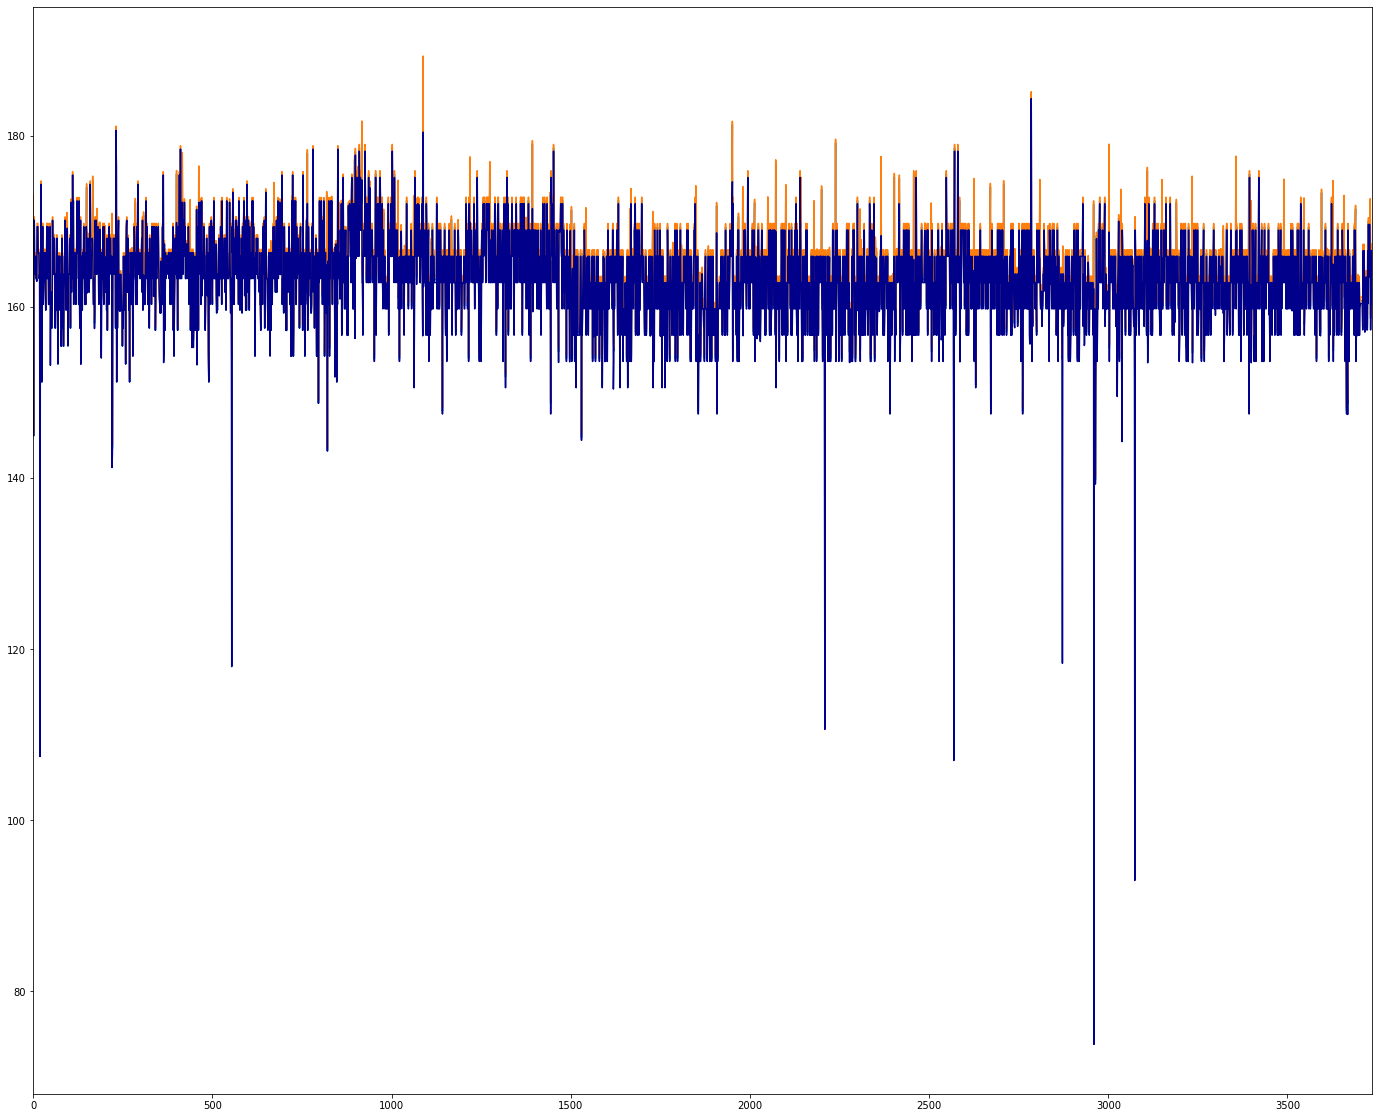

In [53]:
data_ml = data_copy[columns_factors]
for _ in range(0):
    index_of_outler = data_ml[data_ml['Вес заготовок, т'] == data_ml['Вес заготовок, т'].min()].index[0]
    data_ml = data_ml.drop(index=index_of_outler)
display(data_ml['Расход воды на кр-р, л/мин'].min())
display(data_ml['Расход воды на кр-р, л/мин'].max())
# (data_ml['Скорость разливки, м/мин']*205/2 + 3695/2 - data_ml['Расход воды на кр-р, л/мин']).plot(figsize=(24, 20))
(data_ml['Вес разлитой стали, т']).plot(figsize=(24, 20))
data_ml['Вес стали расчет., т'].plot()
data_ml['Вес заготовок, т'].plot(color='DarkBlue')

In [52]:
pd.plotting.scatter_matrix(data_ml[''], alpha=0.2)

1

In [16]:
data_ml_corr = data_ml.corr()

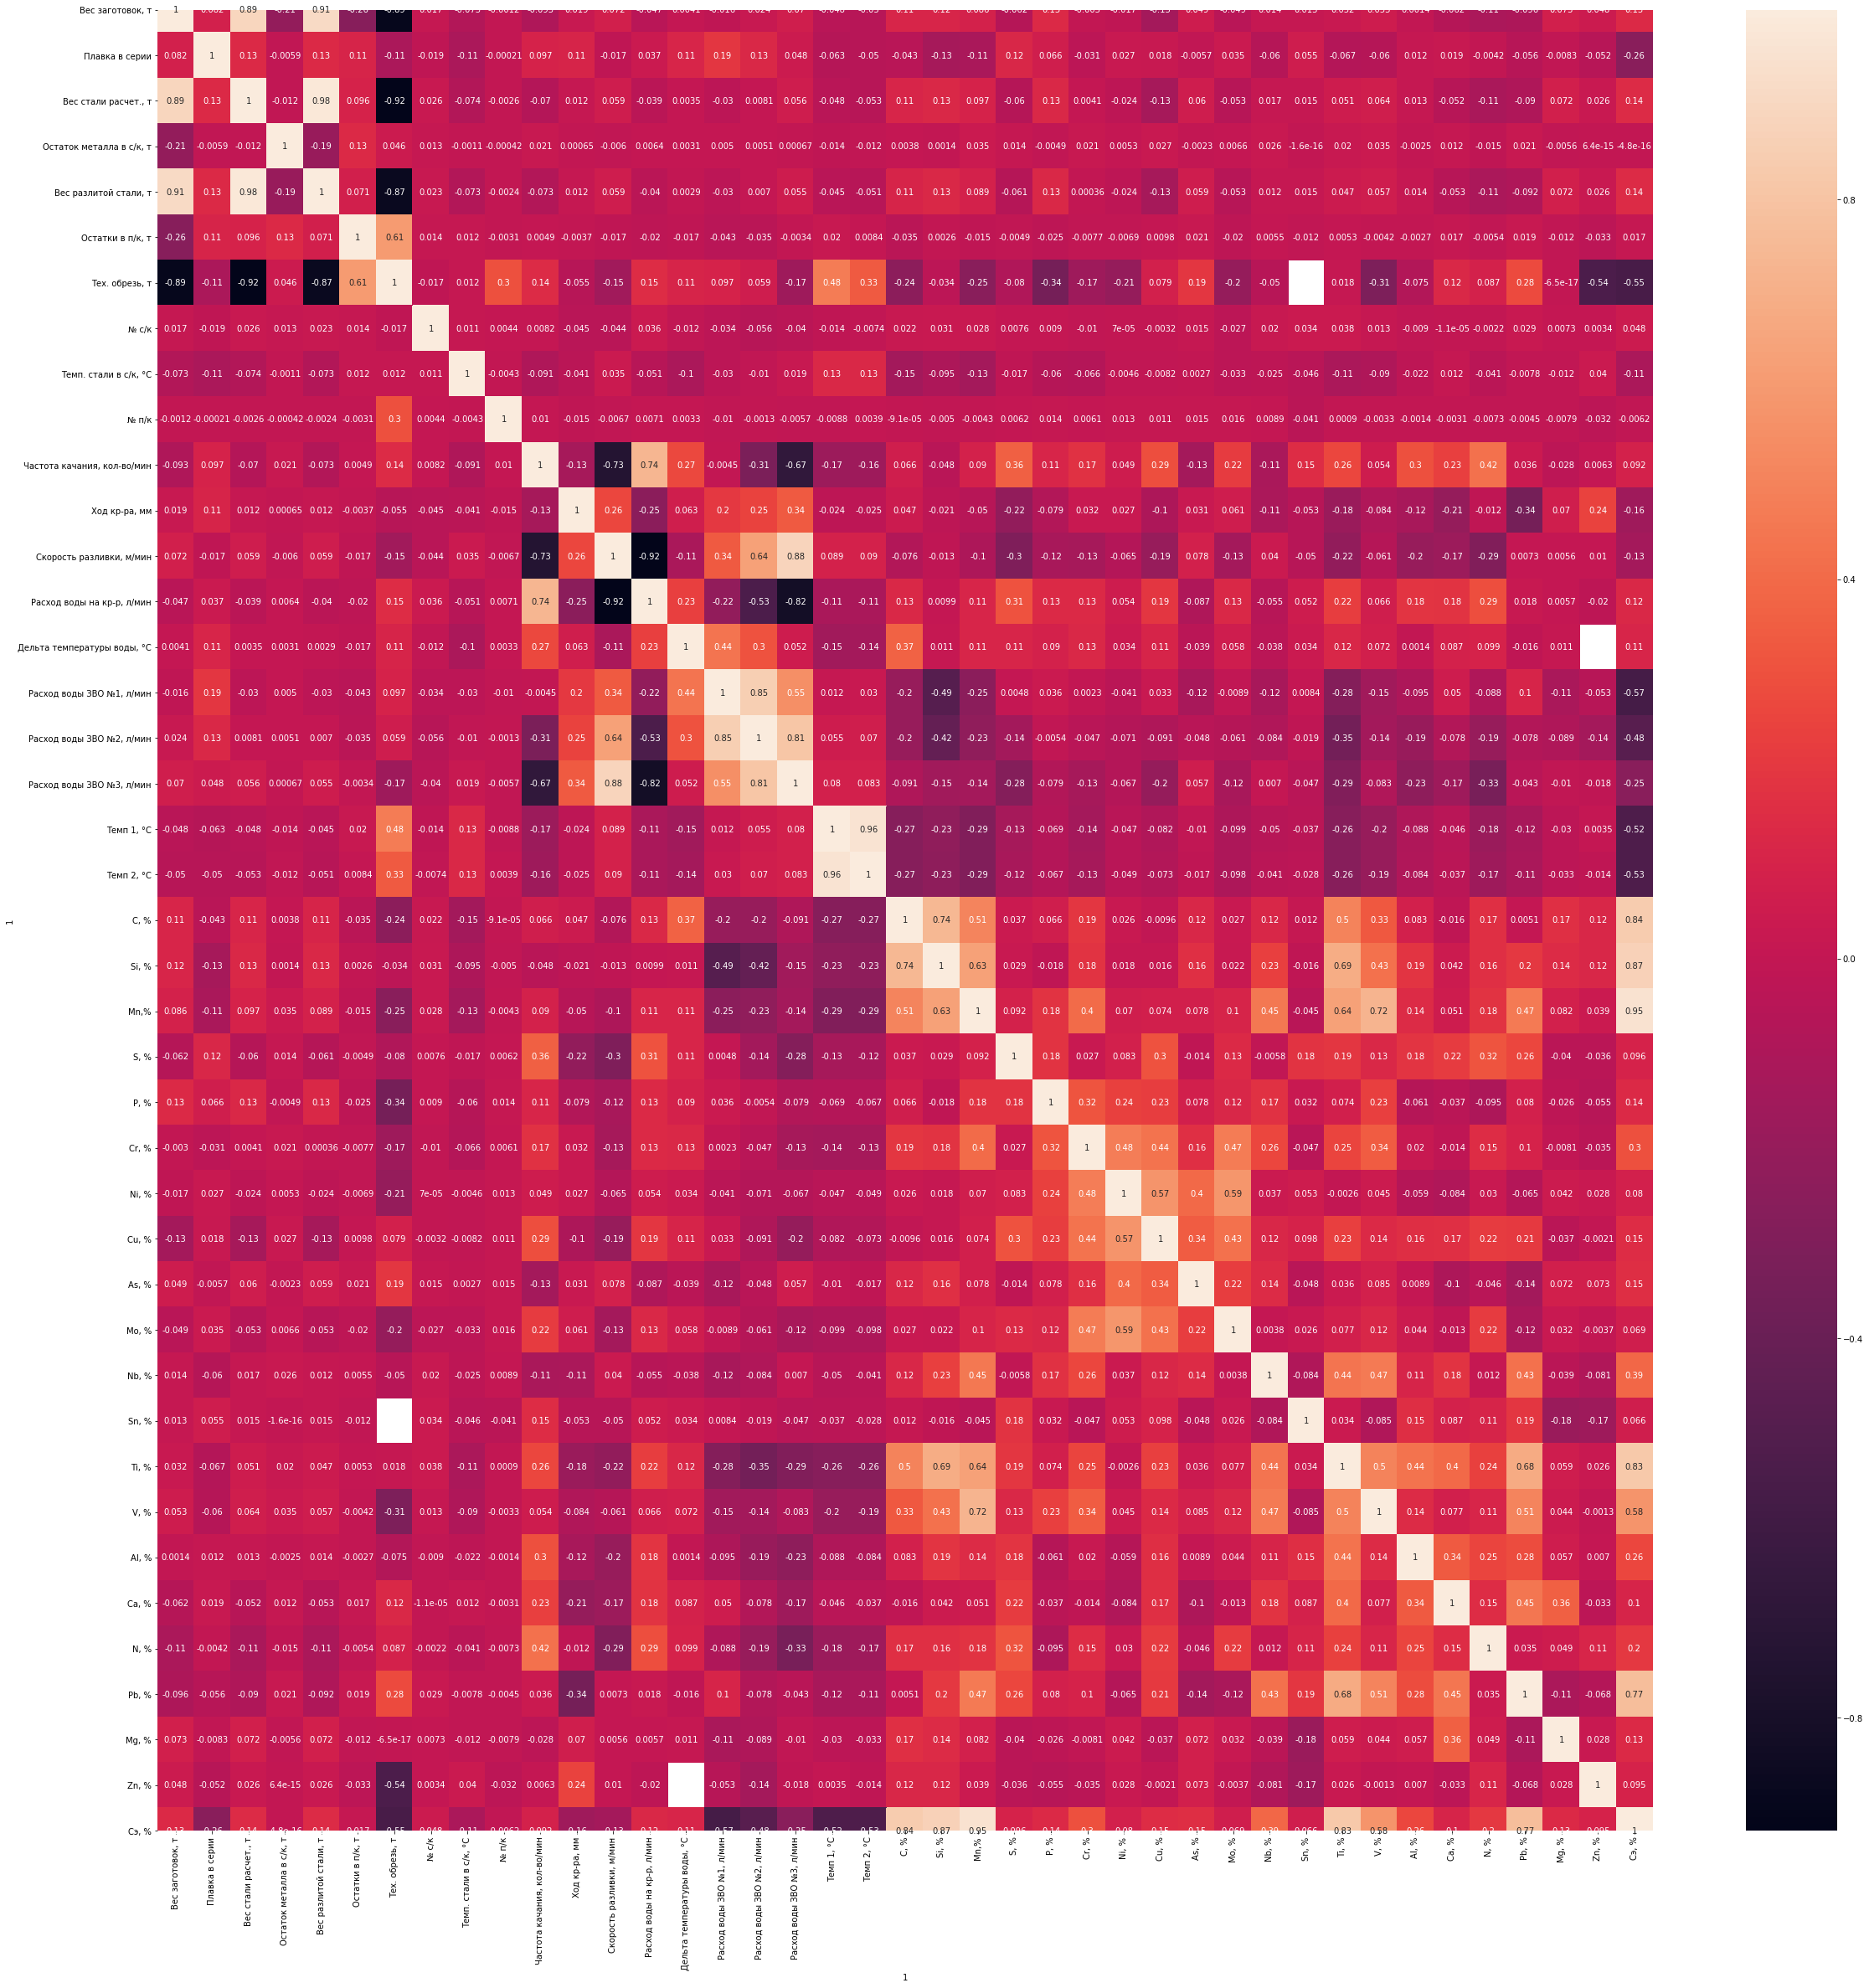

In [18]:
fig, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(data_ml_corr, 
        xticklabels=data_ml.corr().columns,
        yticklabels=data_ml.corr().columns,annot=True,ax=ax)

In [74]:
name = '№ с/к'
display(data_ml[name].value_counts())
data_ml[name].nunique()

12.0    369
2.0     367
5.0     358
1.0     347
6.0     336
7.0     336
10.0    316
4.0     316
3.0     315
11.0    312
9.0     308
Name: № с/к, dtype: int64

11

In [47]:
with pd.option_context('display.max_rows', None,'display.max_columns', None):
    display(data_ml.head(10))

1,"Вес заготовок, т",Плавка в серии,Сечение заготовки,Тип разливки,"Вес стали расчет., т","Вес шлака при закрытии с/к, т","Остаток металла в с/к, т","Вес разлитой стали, т","Остатки в п/к, т","Тех. обрезь, т",№ с/к,"Темп. стали в с/к, °C",№ п/к,"Частота качания, кол-во/мин","Ход кр-ра, мм","Скорость разливки, м/мин","Расход воды на кр-р, л/мин","Дельта температуры воды, °C","Расход воды ЗВО №1, л/мин","Расход воды ЗВО №2, л/мин","Расход воды ЗВО №3, л/мин",Кол-во НЛЗ 1 ручей,Кол-во НЛЗ 2 ручей,Кол-во НЛЗ 3 ручей,Кол-во НЛЗ 4 ручей,Кол-во НЛЗ 5 ручей,Кол-во НЛЗ 6 ручей,"Темп 1, °С","Темп 2, °С","C, %","Si, %","Mn,%","S, %","P, %","Cr, %","Ni, %","Cu, %","As, %","Mo, %","Nb, %","Sn, %","Ti, %","V, %","Al, %","Ca, %","N, %","W, %","Bi, %","Pb, %","Sb, %","Mg, %","Zn, %","Сэ, %"
0,170.188,6.0,150x150,Открытая,173.088,1.8,0.4,172.688,0.0,NaN,4.0,1576.0,3.0,165.0,10.0,3.0,1950.0,9.0,320.0,400.0,170.0,NaN,NaN,NaN,NaN,NaN,NaN,1549.0,1553.0,0.1788,0.1540,0.5090,0.0076,0.0233,0.0345,0.0157,0.0326,0.0014,0.0020,0.0006,0.0004,0.0007,0.0022,0.0029,0.0011,0.0040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,144.900,4.0,150x150,Открытая,145.300,1.8,0.4,144.900,0.0,NaN,4.0,NaN,5.0,180.0,9.0,3.0,1950.0,9.0,360.0,400.0,180.0,NaN,NaN,NaN,NaN,NaN,NaN,1549.0,1545.0,0.1873,0.1469,0.5242,0.0051,0.0136,0.0252,0.0196,0.0280,0.0014,0.0024,0.0006,0.0004,0.0006,0.0030,0.0022,0.0008,0.0085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,168.000,5.0,150x150,Открытая,168.400,1.8,0.4,168.000,0.0,NaN,7.0,1579.0,5.0,180.0,10.0,3.0,1950.0,9.0,340.0,400.0,170.0,NaN,NaN,NaN,NaN,NaN,NaN,1547.0,1548.0,0.1936,0.1690,0.6231,0.0026,0.0124,0.0341,0.0163,0.0311,0.0016,0.0016,0.0006,0.0005,0.0007,0.0028,0.0031,0.0011,0.0068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,170.100,7.0,150x150,Открытая,170.500,1.8,0.4,170.100,0.0,NaN,12.0,1563.0,5.0,180.0,10.0,3.0,1950.0,9.0,360.0,420.0,170.0,NaN,NaN,NaN,NaN,NaN,NaN,1540.0,1539.0,0.1977,0.1850,0.7124,0.0014,0.0191,0.0428,0.0152,0.0291,0.0018,0.0016,0.0007,0.0006,0.0010,0.0030,0.0034,0.0005,0.0051,NaN,NaN,NaN,NaN,NaN,NaN,0.329
4,163.800,12.0,150x150,Открытая,164.200,1.8,0.4,163.800,0.0,NaN,12.0,1565.0,5.0,180.0,10.0,3.0,1950.0,9.0,360.0,420.0,170.0,NaN,NaN,NaN,NaN,NaN,NaN,1543.0,1541.0,0.1886,0.1943,0.7041,0.0034,0.0088,0.0359,0.0182,0.0350,0.0015,0.0021,0.0007,0.0006,0.0010,0.0027,0.0032,0.0004,0.0038,NaN,NaN,NaN,NaN,NaN,NaN,0.318
5,163.800,14.0,150x150,Открытая,164.200,1.8,0.4,163.800,0.0,NaN,4.0,1568.0,5.0,180.0,10.0,3.0,1950.0,9.0,360.0,420.0,170.0,NaN,NaN,NaN,NaN,NaN,NaN,1545.0,1547.0,0.1940,0.1781,0.6937,0.0027,0.0106,0.0395,0.0182,0.0346,0.0014,0.0025,0.0006,0.0007,0.0008,0.0027,0.0043,0.0005,0.0035,NaN,NaN,NaN,NaN,NaN,NaN,0.322
6,165.900,2.0,150x150,Закрытая,166.300,1.8,0.4,165.900,0.0,NaN,12.0,1585.0,7.0,160.0,7.0,2.0,1950.0,6.0,175.0,220.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,1561.0,1557.0,0.0874,0.1887,0.4570,0.0016,0.0104,0.0463,0.0229,0.0315,0.0014,0.0029,0.0006,0.0008,0.0007,0.0020,0.0030,0.0011,0.0035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,163.783,4.0,150x150,Закрытая,164.183,1.8,0.4,163.783,0.0,NaN,4.0,1580.0,7.0,170.0,7.0,2.0,1950.0,6.0,185.0,230.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,1554.0,1550.0,0.0818,0.1774,0.4700,0.0013,0.0073,0.0308,0.0158,0.0316,0.0020,0.0014,0.0006,0.0013,0.0007,0.0019,0.0032,0.0007,0.0052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,163.296,4.0,180x180,Открытая,163.696,1.8,0.4,163.296,0.0,NaN,4.0,1576.0,6.0,180.0,7.0,2.0,2155.0,9.0,300.0,340.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,1550.0,1548.0,0.1876,0.1570,0.4973,0.0030,0.0131,0.0428,0.0184,0.0313,0.0013,0.0040,0.0005,0.0004,0.0007,0.0023,0.0031,0.0008,0.0041,NaN,NaN,NaN,NaN,NaN,NaN,0.284
9,163.296,6.0,180x180,Открытая,163.696,1.8,0.4,163.296,0.0,NaN,3.0,1577.0,6.0,180.0,7.0,2.0,2155.0,9.0,300.0,340.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,1552.0,1550.0,0.1894,0.1571,0.4992,0.0025,0.0149,0.0410,0.0165,0.0276,0.0017,0.0024,0.0005,NaN,0.0007,0.0024,0.0023,0.0008,0.0032,NaN,NaN,NaN,NaN,NaN,NaN,0.285


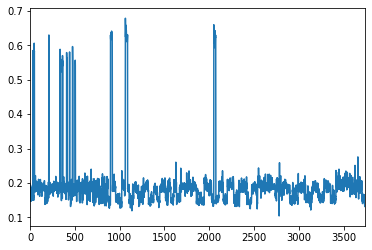

In [9]:
data_copy['Si, %'].plot()

In [11]:
data_copy[data_copy['Плавка в серии'] == 1].sort_values(by='Дата')\
[[f'Стойкость гильзы кр-ра {t}, т' for t in range(1, 7)] + ['Дата']].dropna().head(5)

1,"Стойкость гильзы кр-ра 1, т","Стойкость гильзы кр-ра 2, т","Стойкость гильзы кр-ра 3, т","Стойкость гильзы кр-ра 4, т","Стойкость гильзы кр-ра 5, т","Стойкость гильзы кр-ра 6, т",Дата
172,4710.0,3009.0,1559.0,3236.0,2742.0,2569.0,2020-01-05
1810,8856.0,8639.0,3201.0,9135.0,3364.0,3699.0,2020-01-08
2781,11322.0,3366.0,4351.0,3386.0,5963.0,3384.0,2020-01-09
3732,13446.0,10064.0,8063.0,8049.0,9568.0,12870.0,2020-01-10
167,1447.0,1441.0,1441.0,1398.0,1453.0,27.0,2020-02-05


In [64]:
data_copy.describe()[[f'Стойкость гильзы кр-ра {t}, т' for t in range(1, 7)]]

1,"Стойкость гильзы кр-ра 1, т","Стойкость гильзы кр-ра 2, т","Стойкость гильзы кр-ра 3, т","Стойкость гильзы кр-ра 4, т","Стойкость гильзы кр-ра 5, т","Стойкость гильзы кр-ра 6, т"
count,3730.000000,3635.000000,3634.000000,3673.000000,3718.000000,3.730000e+03
mean,5711.218767,5898.692985,5478.534673,5712.760686,5633.689618,7.336251e+03
std,3333.096737,3461.054169,3436.859483,3160.998347,3559.317643,1.387688e+05
min,25.000000,25.000000,25.000000,9.000000,25.000000,2.400000e+01
25%,3324.250000,3523.000000,2746.250000,3105.000000,2718.000000,1.976000e+03
50%,5211.000000,5728.000000,5109.000000,5979.000000,5193.000000,4.306500e+03
75%,7977.750000,8662.500000,7683.750000,7884.000000,8409.750000,7.390500e+03
max,17731.000000,100097.000000,16425.000000,12759.000000,18863.000000,8.473135e+06


In [62]:
data_copy['Стойкость гильзы кр-ра 6, т'].dropna().sort_values()

807          24.0
775          24.0
3003         25.0
2586         25.0
1667         25.0
          ...    
2098      13695.0
2099      13722.0
2100      13750.0
988      273270.0
848     8473135.0
Name: Стойкость гильзы кр-ра 6, т, Length: 3730, dtype: float64

In [66]:
sum(data_copy[[f'Стойкость гильзы кр-ра {t}, т' for t in range(1, 7)]].dropna())

TypeError: unsupported operand type(s) for +: 'int' and 'str'

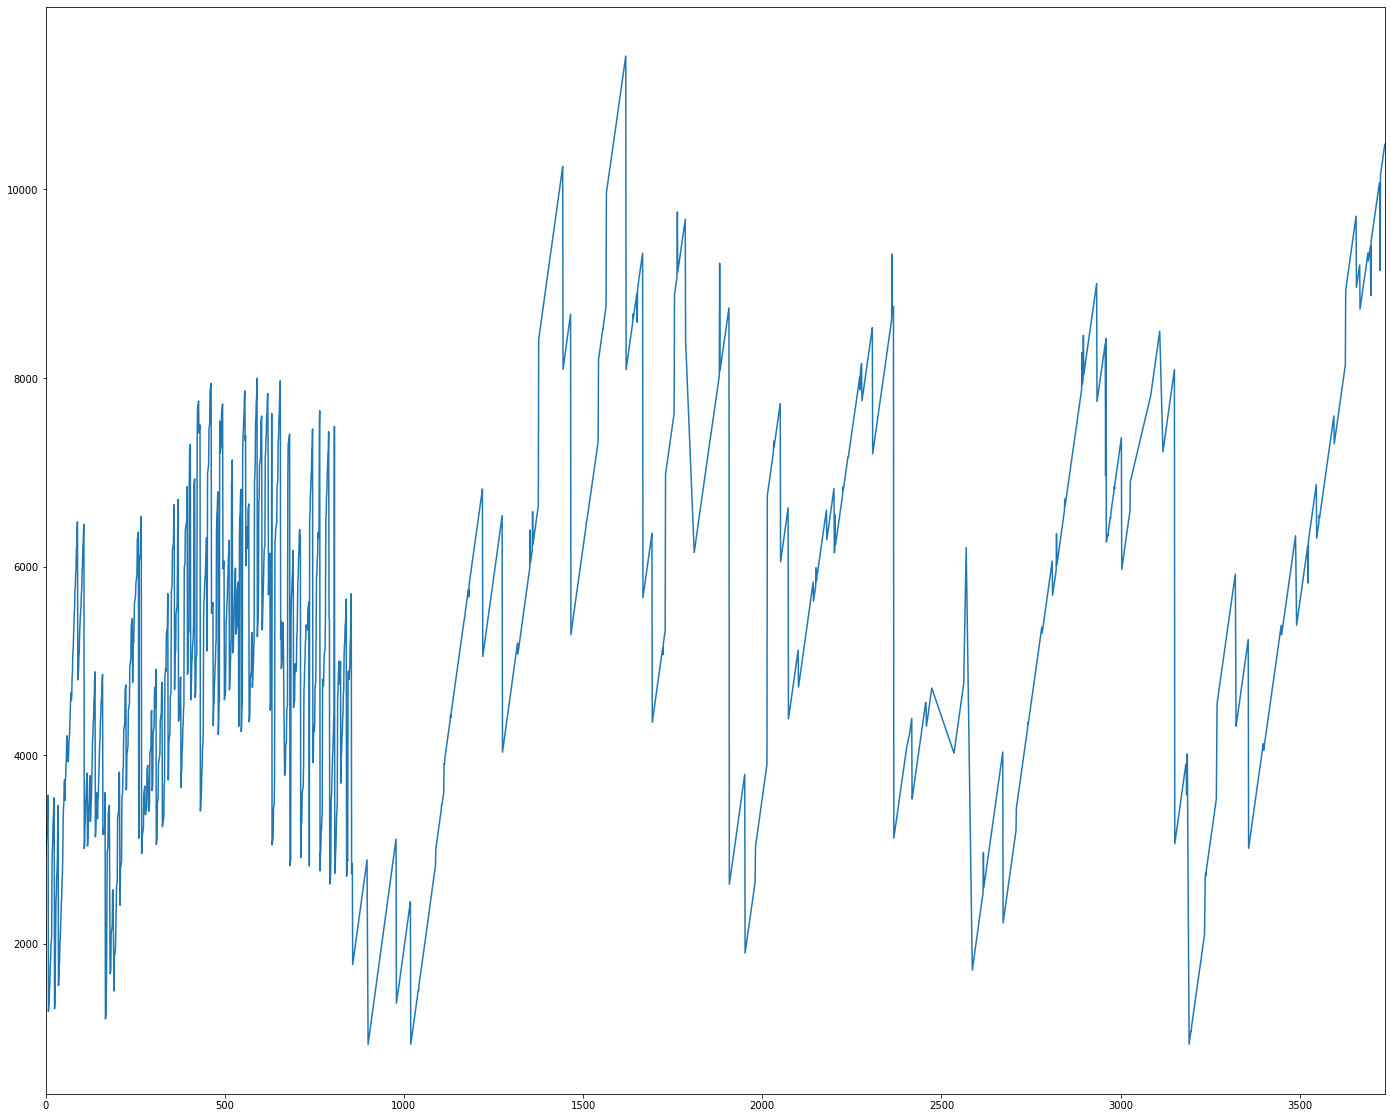

In [40]:
data_mean_mold = (data_copy['Стойкость гильзы кр-ра 1, т'] + data_copy['Стойкость гильзы кр-ра 2, т'] + \
data_copy['Стойкость гильзы кр-ра 3, т'] + data_copy['Стойкость гильзы кр-ра 4, т'] + \
data_copy['Стойкость гильзы кр-ра 5, т'] + data_copy['Стойкость гильзы кр-ра 6, т']) // 6

data_mean_mold = pd.DataFrame(data={'Среднее': data_mean_mold, 'Дата': data_copy['Дата']})
data_mean_mold = data_mean_mold.dropna()
for _ in range(3):
    index_of_outler = data_mean_mold[data_mean_mold['Среднее'] == data_mean_mold['Среднее'].max()].index[0]
    data_mean_mold = data_mean_mold.drop(index=index_of_outler)
data_mean_mold['Среднее'].plot(figsize=(24, 20))
data_mean_mold.index = data_mean_mold['Дата']

In [84]:
data_copy[[f'Стойкость гильзы кр-ра {t}, т' for t in range(1, 7)]]

1,"Стойкость гильзы кр-ра 1, т","Стойкость гильзы кр-ра 2, т","Стойкость гильзы кр-ра 3, т","Стойкость гильзы кр-ра 4, т","Стойкость гильзы кр-ра 5, т","Стойкость гильзы кр-ра 6, т"
0,NaN,2925.0,1475.0,3152.0,2658.0,2487.0
1,4790.0,3091.0,1639.0,3316.0,2822.0,2646.0
2,4817.0,3118.0,1666.0,3345.0,2849.0,2676.0
3,4874.0,3175.0,1718.0,3400.0,2906.0,2730.0
4,5010.0,3315.0,1853.0,3536.0,3048.0,2869.0
...,...,...,...,...,...,...
3733,13474.0,10092.0,8088.0,8074.0,9596.0,12898.0
3734,13505.0,10116.0,8113.0,8098.0,9627.0,12929.0
3735,13530.0,10144.0,8140.0,8126.0,9651.0,12957.0
3736,13557.0,10172.0,8168.0,8157.0,9679.0,12981.0
